In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

C:\Users\lenovo\anaconda3\envs\SentimentCapstone\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\tripadvisor_hotel_reviews.csv')

In [7]:
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [15]:
df = pd.DataFrame(df)
print(df.shape)
print(df.info())

(20491, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB
None


In [20]:
scores = pd.DataFrame(df.groupby('Rating').size().sort_values(ascending=False)).reset_index()

In [21]:
scores.rename(columns={0:'count'},inplace=True)

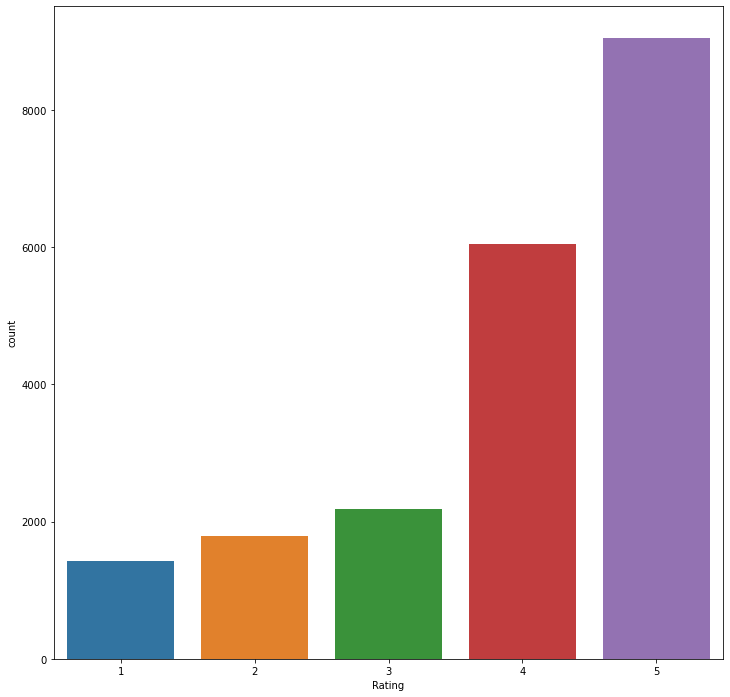

In [27]:
plt.figure(figsize=(12,12))
sns.barplot(x='Rating',y='count',data=scores)
plt.show()

In [ ]:
# Adjusting Class Imbalance for Scores

In [28]:
minority_class_len = len(df[df['Rating'] == 1])
minority_class_len

1421

In [29]:
score_1_class_indices = df[df['Rating'] == 1].index
score_2_class_indices = df[df['Rating'] == 2].index
score_3_class_indices = df[df['Rating'] == 3].index
score_4_class_indices = df[df['Rating'] == 4].index
score_5_class_indices = df[df['Rating'] == 5].index

In [30]:
random_score_2_class_indices = np.random.choice(score_2_class_indices,minority_class_len,replace=False)
print(len(random_score_2_class_indices))
random_score_3_class_indices = np.random.choice(score_3_class_indices,minority_class_len,replace=False)
print(len(random_score_3_class_indices))
random_score_4_class_indices = np.random.choice(score_4_class_indices,minority_class_len,replace=False)
print(len(random_score_4_class_indices))
random_score_5_class_indices = np.random.choice(score_5_class_indices,minority_class_len,replace=False)
print(len(random_score_5_class_indices))

1421
1421
1421
1421


In [33]:
under_sample_indices = np.concatenate([score_1_class_indices,random_score_2_class_indices,random_score_3_class_indices,random_score_4_class_indices,random_score_5_class_indices])

In [34]:
df = df.loc[under_sample_indices]

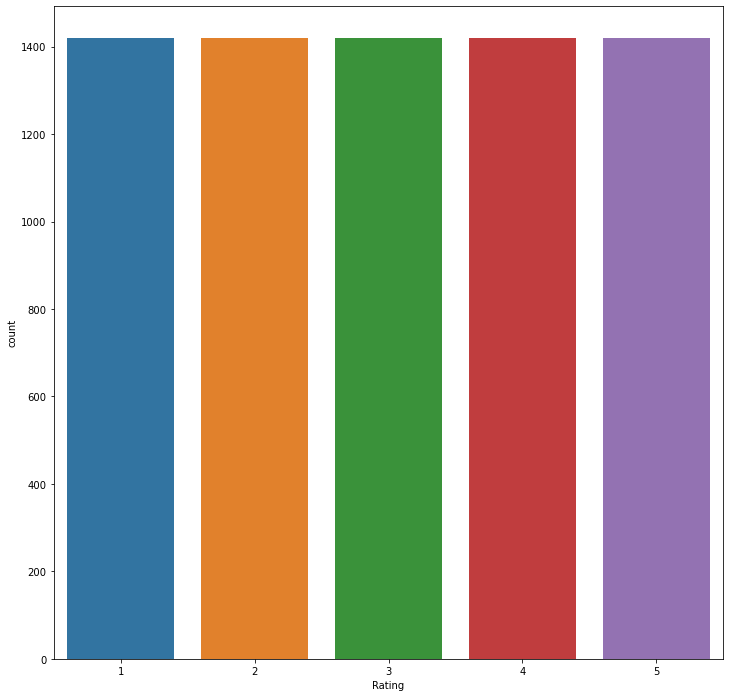

In [35]:
plt.figure(figsize=(12,12))
sns.countplot(x='Rating',data=df)
plt.show()

In [36]:
df.describe()

,Rating
count,7105.000000
mean,3.000000
std,1.414313
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [39]:
df.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data/tripadvisor_hotel_reviews_structured.csv',index=False)